In [5]:
from ncon import ncon
import matplotlib.pyplot as plt
from pylab import *
import numpy as np

In [10]:
"""This is an attempt to implement the TDVP in simpler way than in the paper """

def init_U(D):
    """ Returns a random unitary """
    U,x = np.linalg.qr(np.random.rand(D,D))
    return U

def init_H(D):
    """ Returns a random hermitian """
    H = np.random.normal(0.0,1.0,(D,D))
    H = H.T+H
    assert np.allclose(H, H.T.conj())
    return H

def get_s(d):
    """ returns a spin up vector """
    s=np.zeros((d),dtype=np.float64)
    s[0]=1.0
    return s

def get_Polar(M):
    """ Return the polar decomposition of M """
    x,y,z =  np.linalg.svd(M)
    M = ncon([x,z],([-1,1],[1,-2]))
    return M

def get_DMRG(H,D):
    s = get_s(D)
    En = []
    T = []
    alpha = 0.10
    m=1
    U = init_U(D)
    
    while m < 30:
        H2 = ncon([H,H],([-1,1],[1,-2]))
        dU = ncon([s,U,H-4*eye(D),s],([1],[1,2],[2,-2],[-1]))
        U = get_Polar(dU)
        Energy = ncon([s,U,H,np.conj(U).T,s],([1],[1,2],[2,3],[3,4],[4]))
        En.append(Energy)
        T.append(m)
        m +=1

    plt.plot(T,En)
    plt.show()
    print(Energy)
    return

[[-1.88936378  0.14373545  1.01500983]
 [ 0.14373545  0.50427118 -2.80270554]
 [ 1.01500983 -2.80270554 -2.42163032]]
[-4.468022   -1.58227044  2.24356953]


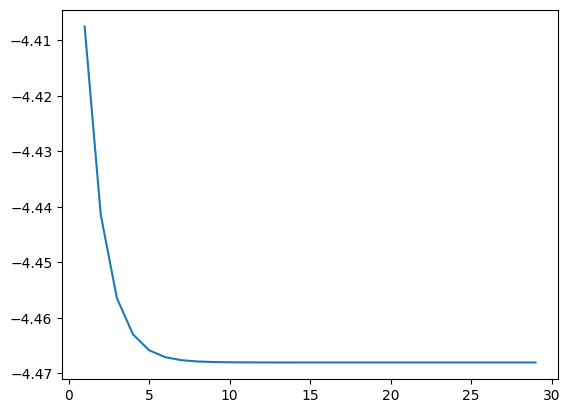

-4.468021998630369


In [11]:
#np.random.seed(1)
D=3
U = init_U(D)
H = init_H(D)
L,x=np.linalg.eig(H)
print(H)
print(L)
get_DMRG(H,D)